### Building Location Significance of Bird Ridership

The code below uses random forests to measure the signifance of the locations of bulidings on campus to scooter ridership. 

In [1]:
import requests
import json
import pandas as pd
from IPython.display import display

In [2]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [3]:
conda install osmnx

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - osmnx

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [4]:
pip install osmnx

Note: you may need to restart the kernel to use updated packages.


In [5]:
import osmnx as ox

In [6]:
place = 'University of California, Los Angeles'

In [7]:
tags = {'building':'university'}
buildings = ox.geometries_from_place(place, tags=tags)
buildings.head()

layer  \
element_type osmid             
way          44669501    NaN   
             179088301   NaN   
             184446757     2   
             184480980     1   
             184488678     4   

                                                                 geometry  \
element_type osmid                                                          
way          44669501   POLYGON ((-118.44432 34.06605, -118.44432 34.0...   
             179088301  POLYGON ((-118.44415 34.06649, -118.44414 34.0...   
             184446757  POLYGON ((-118.44407 34.07348, -118.44373 34.0...   
             184480980  POLYGON ((-118.44189 34.06657, -118.44188 34.0...   
             184488678  POLYGON ((-118.44357 34.07417, -118.44361 34.0...   

                       wheelchair             amenity access  \
element_type osmid                                             
way          44669501         NaN  research_institute    NaN   
             179088301        NaN  research_institute    NaN   
             184446757        NaN                 NaN    NaN   
             184480980        NaN                 NaN    NaN   
             184488678        NaN                 NaN    NaN   

                                                                    nodes  \
element_type osmid                                                          
way          44669501   [566899778, 2392101271, 1894242151, 9456308329...   
             179088301  [9456327163, 8925281018, 8925281019, 189424215...   
             184446757  [1949285141, 1949285183, 10721962659, 19492850...   
             184480980  [1949734959, 8925274874, 8925274875, 892527487...   
             184488678  [1949855086, 1949855060, 1952186693, 194985508...   

                          addr:city addr:housenumber addr:postcode  \
element_type osmid                                                   
way          44669501   Los Angeles              740         90095   
             179088301  Los Angeles              670         90095   
             184446757          NaN              NaN           NaN   
             184480980  Los Angeles              700         90095   
             184488678          NaN              NaN           NaN   

                                         addr:street  ... addr:housename  \
element_type osmid                                    ...                  
way          44669501                 Westwood Plaza  ...            NaN   
             179088301  Charles E. Young Drive South  ...            NaN   
             184446757                           NaN  ...            NaN   
             184480980               Tiverton Avenue  ...            NaN   
             184488678                           NaN  ...            NaN   

                       check_date leisure operator sport ways type  \
element_type osmid                                                   
way          44669501         NaN     NaN      NaN   NaN  NaN  NaN   
             179088301        NaN     NaN      NaN   NaN  NaN  NaN   
             184446757        NaN     NaN      NaN   NaN  NaN  NaN   
             184480980        NaN     NaN      NaN   NaN  NaN  NaN   
             184488678        NaN     NaN      NaN   NaN  NaN  NaN   

                       building:levels:underground building:material  \
element_type osmid                                                     
way          44669501                          NaN               NaN   
             179088301                         NaN               NaN   
             184446757                         NaN               NaN   
             184480980                         NaN               NaN   
             184488678                         NaN               NaN   

                       building:min_level  
element_type osmid                         
way          44669501                 NaN  
             179088301                NaN  
             184446757                NaN  
             184480980       

In [8]:
len(buildings.index)

66

In [9]:
buildings.plot

In [10]:
tags = {'amenity':'research_institute'}
buildings = ox.geometries_from_place(place, tags=tags)
buildings.head()

geometry  \
element_type osmid                                                          
way          44669498   POLYGON ((-118.44493 34.06641, -118.44493 34.0...   
             44669501   POLYGON ((-118.44432 34.06605, -118.44432 34.0...   
             179088301  POLYGON ((-118.44415 34.06649, -118.44414 34.0...   
             422876543  POLYGON ((-118.44429 34.06429, -118.44483 34.0...   

                                                                    nodes  \
element_type osmid                                                          
way          44669498   [566899722, 7567809536, 8925324293, 8925324292...   
             44669501   [566899778, 2392101271, 1894242151, 9456308329...   
             179088301  [9456327163, 8925281018, 8925281019, 189424215...   
             422876543  [4226023249, 4226023246, 2341171124, 941356582...   

                          addr:city addr:housenumber addr:postcode  \
element_type osmid                                                   
way          44669498   Los Angeles              710         90095   
             44669501   Los Angeles              740         90095   
             179088301  Los Angeles              670         90095   
             422876543          NaN              200         90095   

                                         addr:street             amenity  \
element_type osmid                                                         
way          44669498                 Westwood Plaza  research_institute   
             44669501                 Westwood Plaza  research_institute   
             179088301  Charles E. Young Drive South  research_institute   
             422876543                   Stein Plaza  research_institute   

                          building gnis:feature_id  \
element_type osmid                                   
way          44669498          yes         1657443   
             44669501   university             NaN   
             179088301  university             NaN   
             422876543  university         1657710   

                                                                     name  \
element_type osmid                                                          
way          44669498                   Reed Neurological Research Center   
             44669501   Semel Institute for Neuroscience and Human Beh...   
             179088301                           Brain Research Institute   
             422876543                    Doris Stein Eye Research Center   

                        ... roof:levels roof:shape  \
element_type osmid      ...                          
way          44669498   ...         NaN        NaN   
             44669501   ...           1       flat   
             179088301  ...         NaN        NaN   
             422876543  ...         NaN        NaN   

                                            website  wikidata  \
element_type osmid                                              
way          44669498                           NaN       NaN   
             44669501   https://www.semel.ucla.edu/  Q7449197   
             179088301     http://www.bri.ucla.edu/       NaN   
             422876543                          NaN       NaN   

                                                                wikipedia  \
element_type osmid                                                          
way          44669498                                                 NaN   
             44669501   en:Semel Institute for Neuroscience and Human ...   
             179088301                                                NaN   
             422876543                                                NaN   

                       alt_addr:housenumber alt_addr:street height  \
element_type osmid                                                   
way          44669498                   NaN             NaN    NaN   
             44669501                   NaN             NaN    NaN   
             1

In [11]:
address = 'University of California, Los Angeles'

In [12]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# get the data from OSM that are tagged as 'building' for a 1000m X 1000m square area
osm = ox.geometries_from_address(address,tags={'building':True},dist=1000)

CPU times: total: 438 ms
Wall time: 430 ms


In [13]:
osm.shape

(1799, 101)

<Axes: >

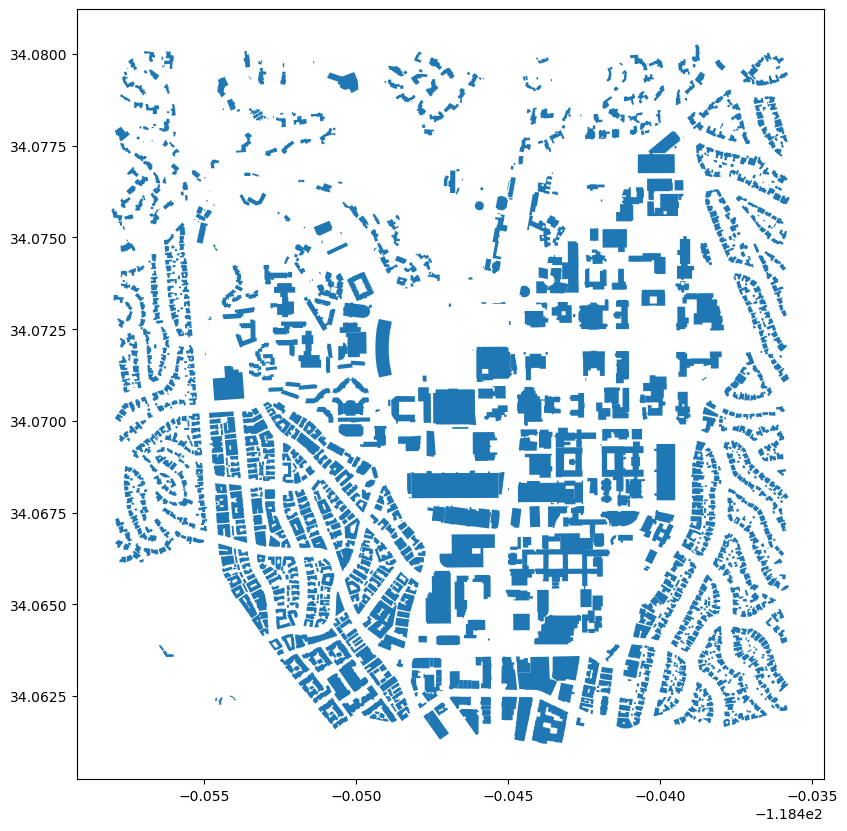

In [14]:
osm.plot(figsize=(10,10))

In [15]:
type(osm)

geopandas.geodataframe.GeoDataFrame

In [16]:
osm.sample(10)

access  amenity parking  \
element_type osmid                               
way          231967248    NaN      NaN     NaN   
             422515551    NaN      NaN     NaN   
             424743589    NaN      NaN     NaN   
             422520043    NaN      NaN     NaN   
             422876626    NaN  library     NaN   
             421476152    NaN      NaN     NaN   
             422876600    NaN      NaN     NaN   
relation     6287591      NaN      NaN     NaN   
way          422515393    NaN      NaN     NaN   
             422524511    NaN      NaN     NaN   

                                                                 geometry  \
element_type osmid                                                          
way          231967248  POLYGON ((-118.45268 34.06895, -118.45268 34.0...   
             422515551  POLYGON ((-118.44089 34.06200, -118.44090 34.0...   
             424743589  POLYGON ((-118.44498 34.07654, -118.44495 34.0...   
             422520043  POLYGON ((-118.43657 34.06365, -118.43655 34.0...   
             422876626  POLYGON ((-118.44228 34.07190, -118.44228 34.0...   
             421476152  POLYGON ((-118.45748 34.07038, -118.45749 34.0...   
             422876600  POLYGON ((-118.43797 34.07189, -118.43797 34.0...   
relation     6287591    POLYGON ((-118.44337 34.07503, -118.44342 34.0...   
way          422515393  POLYGON ((-118.43978 34.06332, -118.43981 34.0...   
             422524511  POLYGON ((-118.43862 34.07838, -118.43857 34.0...   

                       level layer wheelchair  fee emergency description  ...  \
element_type osmid                                                        ...   
way          231967248   NaN   NaN        NaN  NaN       NaN         NaN  ...   
             422515551   NaN   NaN        NaN  NaN       NaN         NaN  ...   
             424743589   NaN   NaN        NaN  NaN       NaN         NaN  ...   
             422520043   NaN   NaN        NaN  NaN       NaN         NaN  ...   
             422876626   NaN   NaN        yes  NaN       NaN         NaN  ...   
             421476152   NaN   NaN        NaN  NaN       NaN         NaN  ...   
             422876600   NaN   NaN        NaN  NaN       NaN         NaN  ...   
relation     6287591     NaN   NaN        NaN  NaN       NaN         NaN  ...   
way          422515393   NaN   NaN        NaN  NaN       NaN         NaN  ...   
             422524511   NaN   NaN        NaN  NaN       NaN         NaN  ...   

                       takeaway toilets toilets:access addr:unit  \
element_type osmid                                                 
way          231967248      NaN     NaN            NaN       NaN   
             422515551      NaN     NaN            NaN       NaN   
             424743589      NaN     NaN            NaN       NaN   
             422520043      NaN     NaN            NaN       NaN   
             422876626      NaN     NaN            NaN       NaN   
             421476152      NaN     NaN            NaN       NaN   
             422876600      NaN     NaN            NaN       NaN   
relation     6287591        NaN     NaN            NaN       NaN   
way          422515393      NaN     NaN            NaN       NaN   
             422524511      NaN     NaN            NaN       NaN   

                       internet_access:ssid                    ways  \
element_type osmid                                                    
way          231967248                  NaN                     NaN   
             422515551                  NaN                     NaN   
             424743589                  NaN                     NaN   
             422520043                  NaN                     NaN   
             422876626                  NaN                     NaN   
             421476152                  NaN                     NaN   
             422876600                  NaN                     NaN   
relation     6287591                    NaN  [422876491, 422876514] 

In [17]:
osm.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 1799 entries, ('way', 30724960) to ('relation', 13744792)
Data columns (total 101 columns):
 #    Column                        Non-Null Count  Dtype   
---   ------                        --------------  -----   
 0    access                        9 non-null      object  
 1    amenity                       41 non-null     object  
 2    parking                       12 non-null     object  
 3    geometry                      1799 non-null   geometry
 4    level                         2 non-null      object  
 5    layer                         22 non-null     object  
 6    wheelchair                    10 non-null     object  
 7    fee                           8 non-null      object  
 8    emergency                     2 non-null      object  
 9    description                   4 non-null      object  
 10   nodes                         1799 non-null   object  
 11   building                      1799 non-null   objec

In [18]:
columns_to_keep = ['geometry','building','height','name','addr:street','amenity']
osm = osm[columns_to_keep]
osm.head(10)

geometry  \
element_type osmid                                                          
way          30724960   POLYGON ((-118.44313 34.07350, -118.44309 34.0...   
             44631681   POLYGON ((-118.45181 34.06292, -118.45180 34.0...   
             44631685   POLYGON ((-118.45029 34.06374, -118.45029 34.0...   
             44631687   POLYGON ((-118.44974 34.06198, -118.44975 34.0...   
             44631689   POLYGON ((-118.45074 34.06175, -118.45073 34.0...   
             44669492   POLYGON ((-118.44262 34.06541, -118.44250 34.0...   
             44669498   POLYGON ((-118.44493 34.06641, -118.44493 34.0...   
             44669501   POLYGON ((-118.44432 34.06605, -118.44432 34.0...   
             113902574  POLYGON ((-118.44890 34.06618, -118.44880 34.0...   
             179088301  POLYGON ((-118.44415 34.06649, -118.44414 34.0...   

                           building height  \
element_type osmid                           
way          30724960           yes    NaN   
             44631681    apartments   15.6   
             44631685    apartments   16.1   
             44631687    apartments   13.9   
             44631689    apartments   14.2   
             44669492           yes   68.3   
             44669498           yes    NaN   
             44669501    university    NaN   
             113902574  residential    8.3   
             179088301   university    NaN   

                                                                     name  \
element_type osmid                                                          
way          30724960                                           Parking 5   
             44631681                                     Jacaranda Court   
             44631685                                      Magnolia Court   
             44631687                                      Sycamore Court   
             44631689                                         Olive Court   
             44669492              Marion Davies Children's Health Center   
             44669498                   Reed Neurological Research Center   
             44669501   Semel Institute for Neuroscience and Human Beh...   
             113902574                                   Alpha Epsilon Pi   
             179088301                           Brain Research Institute   

                                         addr:street             amenity  
element_type osmid                                                        
way          30724960                            NaN             parking  
             44631681                Weyburn Terrace                 NaN  
             44631685                  Weyburn Place                 NaN  
             44631687                  Weyburn Place                 NaN  
             44631689                Weyburn Terrace                 NaN  
             44669492                            NaN              clinic  
             44669498                 Westwood Plaza  research_institute  
             44669501                 Westwood Plaza  research_institute  
             113902574                           NaN                 NaN  
             179088301  Charles E. Young Drive South  research_institute

In [19]:
osm_building_counts = osm.value_counts(['building']).reset_index(name="count")
osm_building_counts

,building,count
0,house,1115
1,apartments,261
2,yes,186
3,residential,93
4,university,66
5,retail,17
6,commercial,14
7,school,10
8,garage,8
9,dormitory,6


In [20]:
osm_amenities_counts = osm.value_counts(['amenity']).reset_index(name="count")
osm_amenities_counts

,amenity,count
0,parking,13
1,clinic,7
2,library,4
3,research_institute,4
4,shelter,3
5,hospital,2
6,community_centre,1
7,fast_food,1
8,food_court,1
9,fuel,1


In [21]:
osm['has_university'] = osm['building'].str.contains('university', case=False)

# Display the updated data frame
osm.head(10)

C:\Users\Matucoco\UP_anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


geometry  \
element_type osmid                                                          
way          30724960   POLYGON ((-118.44313 34.07350, -118.44309 34.0...   
             44631681   POLYGON ((-118.45181 34.06292, -118.45180 34.0...   
             44631685   POLYGON ((-118.45029 34.06374, -118.45029 34.0...   
             44631687   POLYGON ((-118.44974 34.06198, -118.44975 34.0...   
             44631689   POLYGON ((-118.45074 34.06175, -118.45073 34.0...   
             44669492   POLYGON ((-118.44262 34.06541, -118.44250 34.0...   
             44669498   POLYGON ((-118.44493 34.06641, -118.44493 34.0...   
             44669501   POLYGON ((-118.44432 34.06605, -118.44432 34.0...   
             113902574  POLYGON ((-118.44890 34.06618, -118.44880 34.0...   
             179088301  POLYGON ((-118.44415 34.06649, -118.44414 34.0...   

                           building height  \
element_type osmid                           
way          30724960           yes    NaN   
             44631681    apartments   15.6   
             44631685    apartments   16.1   
             44631687    apartments   13.9   
             44631689    apartments   14.2   
             44669492           yes   68.3   
             44669498           yes    NaN   
             44669501    university    NaN   
             113902574  residential    8.3   
             179088301   university    NaN   

                                                                     name  \
element_type osmid                                                          
way          30724960                                           Parking 5   
             44631681                                     Jacaranda Court   
             44631685                                      Magnolia Court   
             44631687                                      Sycamore Court   
             44631689                                         Olive Court   
             44669492              Marion Davies Children's Health Center   
             44669498                   Reed Neurological Research Center   
             44669501   Semel Institute for Neuroscience and Human Beh...   
             113902574                                   Alpha Epsilon Pi   
             179088301                           Brain Research Institute   

                                         addr:street             amenity  \
element_type osmid                                                         
way          30724960                            NaN             parking   
             44631681                Weyburn Terrace                 NaN   
             44631685                  Weyburn Place                 NaN   
             44631687                  Weyburn Place                 NaN   
             44631689                Weyburn Terrace                 NaN   
             44669492                            NaN              clinic   
             44669498                 Westwood Plaza  research_institute   
             44669501                 Westwood Plaza  research_institute   
             113902574                           NaN                 NaN   
             179088301  Charles E. Young Drive South  research_institute   

                        has_university  
element_type osmid                      
way          30724960            False  
             44631681            False  
             44631685            False  
             44631687            False  
             44631689            False  
             44669492            False  
             44669498            False  
             44669501             True  
             113902574           False  
             179088301            True

In [22]:
osm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 1799 entries, ('way', 30724960) to ('relation', 13744792)
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   geometry        1799 non-null   geometry
 1   building        1799 non-null   object  
 2   height          1742 non-null   object  
 3   name            234 non-null    object  
 4   addr:street     109 non-null    object  
 5   amenity         41 non-null     object  
 6   has_university  1799 non-null   bool    
dtypes: bool(1), geometry(1), object(5)
memory usage: 170.2+ KB


In [23]:
from shapely.wkt import loads
osm.geometry =  osm['geometry'].apply(loads)

TypeError: Expected bytes or string, got Polygon

In [24]:
scooters230510 = pd.read_csv('Data/Scooters 2023-05-10.csv')

In [25]:
scooters230510.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,title,id,networkName,networkId,color,textColor,latitude,longitude,type,subtitle,stationProperties,reverse_cycle,time
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,2023-05-17 09:00:19.484399
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,2023-05-17 09:10:51.036629
2,2,0.0,0.0,Link Scooter,decba7fc-debf-472a-8d51-2b7244d063e6,LINK,1319.0,E5FF01,07000E,34.06585,-118.44822,electric-scooter,NaN,NaN,72.0,2023-05-17 09:21:22.380851
3,3,1.0,1.0,Link Scooter,808f4162-124f-48cc-a026-f17f61c2dcad,LINK,1319.0,E5FF01,07000E,34.06381,-118.44514,electric-scooter,NaN,NaN,72.0,2023-05-17 09:21:22.380851
4,4,2.0,2.0,Link Scooter,688ad54a-72e5-43d2-ad6f-690fac0c02ae,LINK,1319.0,E5FF01,07000E,34.06957,-118.43843,electric-scooter,NaN,NaN,72.0,2023-05-17 09:21:22.380851


In [26]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x16de9beace0>
C:\Users\Matucoco\UP_anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\Matucoco\UP_anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\Matucoco\UP_anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [27]:
scootergdf = gpd.GeoDataFrame(
    scooters230510, geometry=gpd.points_from_xy(scooters230510.longitude,scooters230510.latitude, 
                                          crs='EPSG:4326'))
scootergdf.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,title,id,networkName,networkId,color,textColor,latitude,longitude,type,subtitle,stationProperties,reverse_cycle,time,geometry
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,2023-05-17 09:00:19.484399,POINT EMPTY
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,2023-05-17 09:10:51.036629,POINT EMPTY
2,2,0.0,0.0,Link Scooter,decba7fc-debf-472a-8d51-2b7244d063e6,LINK,1319.0,E5FF01,07000E,34.06585,-118.44822,electric-scooter,NaN,NaN,72.0,2023-05-17 09:21:22.380851,POINT (-118.44822 34.06585)
3,3,1.0,1.0,Link Scooter,808f4162-124f-48cc-a026-f17f61c2dcad,LINK,1319.0,E5FF01,07000E,34.06381,-118.44514,electric-scooter,NaN,NaN,72.0,2023-05-17 09:21:22.380851,POINT (-118.44514 34.06381)
4,4,2.0,2.0,Link Scooter,688ad54a-72e5-43d2-ad6f-690fac0c02ae,LINK,1319.0,E5FF01,07000E,34.06957,-118.43843,electric-scooter,NaN,NaN,72.0,2023-05-17 09:21:22.380851,POINT (-118.43843 34.06957)


In [28]:
scootergdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 48608 entries, 0 to 48607
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0.2       48608 non-null  int64   
 1   Unnamed: 0.1       48606 non-null  float64 
 2   Unnamed: 0         48606 non-null  float64 
 3   title              48606 non-null  object  
 4   id                 48606 non-null  object  
 5   networkName        48606 non-null  object  
 6   networkId          48606 non-null  float64 
 7   color              48606 non-null  object  
 8   textColor          48606 non-null  object  
 9   latitude           48606 non-null  float64 
 10  longitude          48606 non-null  float64 
 11  type               48606 non-null  object  
 12  subtitle           215 non-null    object  
 13  stationProperties  215 non-null    object  
 14  reverse_cycle      48608 non-null  float64 
 15  time               48608 non-null  object  
 

In [29]:
osm.reset_index(drop=True, inplace=True)

In [30]:
scootergdf.to_crs('EPSG:3497', inplace=True)
osm.to_crs('EPSG:3497', inplace=True)

In [31]:
scootergdf.sjoin_nearest(osm, distance_col='dist_to_building')

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,title,id,networkName,networkId,color,textColor,latitude,...,time,geometry,index_right,building,height,name,addr:street,amenity,has_university,dist_to_building
2,2,0.0,0.0,Link Scooter,decba7fc-debf-472a-8d51-2b7244d063e6,LINK,1319.0,E5FF01,07000E,34.065850,...,2023-05-17 09:21:22.380851,POINT (1958623.693 562859.719),84,apartments,9.4,NaN,NaN,NaN,False,13.758615
556,556,724.0,0.0,Link Scooter,decba7fc-debf-472a-8d51-2b7244d063e6,LINK,1319.0,E5FF01,07000E,34.065850,...,2023-05-17 09:31:53.749638,POINT (1958623.693 562859.719),84,apartments,9.4,NaN,NaN,NaN,False,13.758615
1136,1136,1448.0,0.0,Link Scooter,decba7fc-debf-472a-8d51-2b7244d063e6,LINK,1319.0,E5FF01,07000E,34.065850,...,2023-05-17 09:42:25.160216,POINT (1958623.693 562859.719),84,apartments,9.4,NaN,NaN,NaN,False,13.758615
1386,1386,1698.0,250.0,Electric scooter,9247b235-380e-4283-831f-3d667ca3e5ac,Bird,676.0,333333,FFFFFF,34.065506,...,2023-05-17 09:42:25.160216,POINT (1958642.604 562821.475),84,apartments,9.4,NaN,NaN,NaN,False,0.000000
1717,1717,2171.0,0.0,Link Scooter,decba7fc-debf-472a-8d51-2b7244d063e6,LINK,1319.0,E5FF01,07000E,34.065850,...,2023-05-17 09:52:56.584437,POINT (1958623.693 562859.719),84,apartments,9.4,NaN,NaN,NaN,False,13.758615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46719,46719,47031.0,102.0,Electric scooter,e740aa71-0322-40bf-92be-96a6c0775e50,Bird,676.0,333333,FFFFFF,34.068768,...,2023-05-17 21:38:20.923368,POINT (1958107.571 563185.661),225,apartments,8.1,NaN,NaN,NaN,False,1.645658
47449,47449,47617.0,108.0,Electric scooter,ffb2df83-59cb-4850-90b4-078e388cdbd5,Bird,676.0,333333,FFFFFF,34.068768,...,2023-05-17 21:48:53.187491,POINT (1958107.571 563185.661),225,apartments,8.1,NaN,NaN,NaN,False,1.645658
48178,48178,48176.0,113.0,Electric scooter,2add42d8-611f-434d-96ab-102fb18e1930,Bird,676.0,333333,FFFFFF,34.068768,...,2023-05-17 21:59:24.977470,POINT (1958107.571 563185.661),225,apartments,8.1,NaN,NaN,NaN,False,1.645658
45406,45406,45979.0,231.0,Electric scooter,c129f0d3-f99a-44d9-87f5-2dd55c98f152,Bird,676.0,333333,FFFFFF,34.066189,...,2023-05-17 21:17:17.157116,POINT (1959398.634 562893.878),559,residential,8.7,Alpha Delta Pi,NaN,NaN,False,25.871125


In [34]:
freqs = scootergdf.time.groupby('building').size()
freqs

KeyError: 'building'

<Axes: >

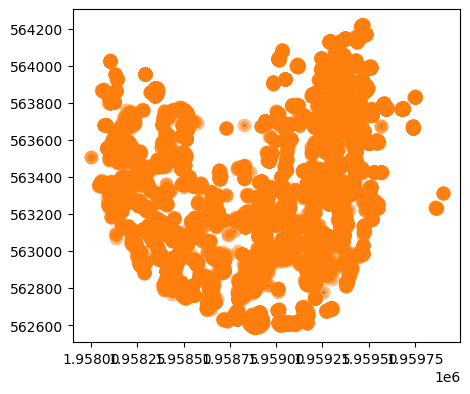

In [35]:
import matplotlib.pyplot as plt

scootergdf_centroids = scootergdf.copy()
scootergdf_centroids.geometry = scootergdf.geometry.centroid

# map to show the centroids 
fig, ax=plt.subplots(figsize=(5,5))
scootergdf_centroids.plot(markersize=1, ax=ax)
scootergdf.plot(ax=ax, lw=4, alpha=0.5)

In [36]:
scootergdf_centroids.sjoin_nearest(osm, distance_col='dist_to_building')

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,title,id,networkName,networkId,color,textColor,latitude,...,time,geometry,index_right,building,height,name,addr:street,amenity,has_university,dist_to_building
2,2,0.0,0.0,Link Scooter,decba7fc-debf-472a-8d51-2b7244d063e6,LINK,1319.0,E5FF01,07000E,34.065850,...,2023-05-17 09:21:22.380851,POINT (1958623.693 562859.719),84,apartments,9.4,NaN,NaN,NaN,False,13.758615
556,556,724.0,0.0,Link Scooter,decba7fc-debf-472a-8d51-2b7244d063e6,LINK,1319.0,E5FF01,07000E,34.065850,...,2023-05-17 09:31:53.749638,POINT (1958623.693 562859.719),84,apartments,9.4,NaN,NaN,NaN,False,13.758615
1136,1136,1448.0,0.0,Link Scooter,decba7fc-debf-472a-8d51-2b7244d063e6,LINK,1319.0,E5FF01,07000E,34.065850,...,2023-05-17 09:42:25.160216,POINT (1958623.693 562859.719),84,apartments,9.4,NaN,NaN,NaN,False,13.758615
1386,1386,1698.0,250.0,Electric scooter,9247b235-380e-4283-831f-3d667ca3e5ac,Bird,676.0,333333,FFFFFF,34.065506,...,2023-05-17 09:42:25.160216,POINT (1958642.604 562821.475),84,apartments,9.4,NaN,NaN,NaN,False,0.000000
1717,1717,2171.0,0.0,Link Scooter,decba7fc-debf-472a-8d51-2b7244d063e6,LINK,1319.0,E5FF01,07000E,34.065850,...,2023-05-17 09:52:56.584437,POINT (1958623.693 562859.719),84,apartments,9.4,NaN,NaN,NaN,False,13.758615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46719,46719,47031.0,102.0,Electric scooter,e740aa71-0322-40bf-92be-96a6c0775e50,Bird,676.0,333333,FFFFFF,34.068768,...,2023-05-17 21:38:20.923368,POINT (1958107.571 563185.661),225,apartments,8.1,NaN,NaN,NaN,False,1.645658
47449,47449,47617.0,108.0,Electric scooter,ffb2df83-59cb-4850-90b4-078e388cdbd5,Bird,676.0,333333,FFFFFF,34.068768,...,2023-05-17 21:48:53.187491,POINT (1958107.571 563185.661),225,apartments,8.1,NaN,NaN,NaN,False,1.645658
48178,48178,48176.0,113.0,Electric scooter,2add42d8-611f-434d-96ab-102fb18e1930,Bird,676.0,333333,FFFFFF,34.068768,...,2023-05-17 21:59:24.977470,POINT (1958107.571 563185.661),225,apartments,8.1,NaN,NaN,NaN,False,1.645658
45406,45406,45979.0,231.0,Electric scooter,c129f0d3-f99a-44d9-87f5-2dd55c98f152,Bird,676.0,333333,FFFFFF,34.066189,...,2023-05-17 21:17:17.157116,POINT (1959398.634 562893.878),559,residential,8.7,Alpha Delta Pi,NaN,NaN,False,25.871125


In [37]:
scootergdf.sjoin_nearest(osm, 
        distance_col='dist_to_building').dist_to_building.mean()

12.205556252039528

In [38]:
scootergdf_centroids.sjoin_nearest(osm, 
        distance_col='dist_to_building').dist_to_building.mean()

12.205556252039528

In [39]:
# as an example, take the first census tract, and get its geometry
tractgeom = osm.iloc[0].geometry

# get the distances from this tract to all the food pantries
distances = scootergdf.distance(tractgeom)
distances.sort_values(inplace=True)
distances

35313       0.000000
10814       0.000000
691         0.000000
15943       0.000000
33149       0.000000
            ...     
13016    1154.986650
8620     1155.341807
7952     1155.644368
0                NaN
1                NaN
Length: 48608, dtype: float64

In [40]:
def get_1st_closest_dist(geom):
    # get distance from every pantry to a single census tract (geom)
    distances = scootergdf.distance(geom)
    first_closest = distances.sort_values().iloc[0]
    return first_closest

scootergdf['dist_first_closest'] = scootergdf.geometry.apply(get_1st_closest_dist)

In [41]:
scootergdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 48608 entries, 0 to 48607
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0.2        48608 non-null  int64   
 1   Unnamed: 0.1        48606 non-null  float64 
 2   Unnamed: 0          48606 non-null  float64 
 3   title               48606 non-null  object  
 4   id                  48606 non-null  object  
 5   networkName         48606 non-null  object  
 6   networkId           48606 non-null  float64 
 7   color               48606 non-null  object  
 8   textColor           48606 non-null  object  
 9   latitude            48606 non-null  float64 
 10  longitude           48606 non-null  float64 
 11  type                48606 non-null  object  
 12  subtitle            215 non-null    object  
 13  stationProperties   215 non-null    object  
 14  reverse_cycle       48608 non-null  float64 
 15  time                48608 no

In [42]:
distances.iloc[2]

0.0

In [43]:
joinedDf = scootergdf.join(osm)
joinedDf.info()
joinedDf.head()

ValueError: columns overlap but no suffix specified: Index(['geometry'], dtype='object')

In [ ]:
scootergdf.set_index('geometry', inplace=True)
osm.set_index('geometry', inplace=True)